In [1]:
import numpy as np
from astropy.io import fits
from astropy.nddata.utils import Cutout2D
#matplotlib inline
%matplotlib notebook
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import copy
from mpl_toolkits.mplot3d import axes3d, Axes3D
import scipy.optimize as opt
import itertools
import pickle

# Import and showdata

In [2]:
hdu = fits.open('std_sub.fits')
data = hdu[0].data
header = hdu[0].header

(2227, 291)


<IPython.core.display.Javascript object>


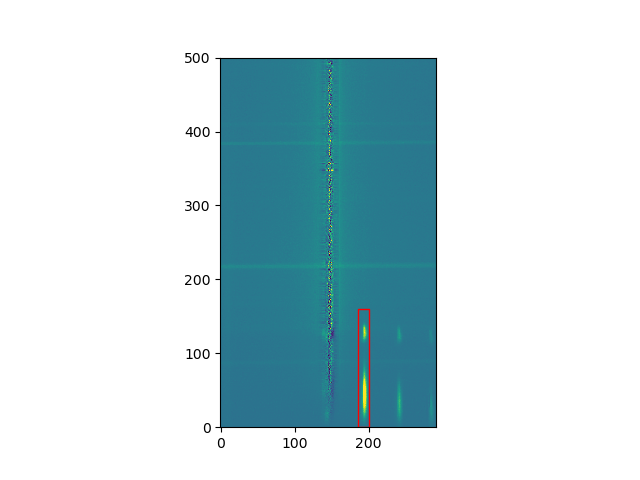

In [3]:
print(np.shape(data))
#plt.figure(figsize=[10,5])

fig, ax = plt.subplots()
ax.imshow(data, vmin=-300, vmax=500)

rect = patches.Rectangle((185, 0), 15, 160, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

ax.set_ylim(0,500)
plt.show()

<IPython.core.display.Javascript object>


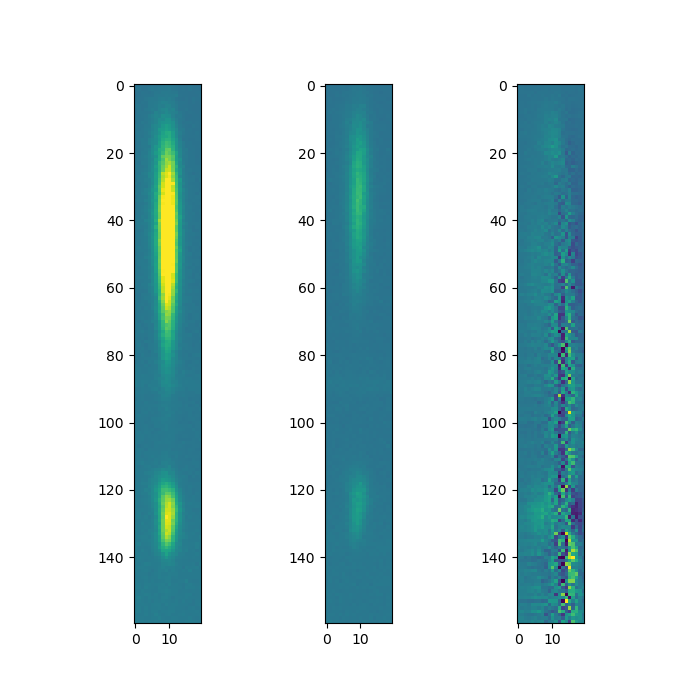

In [5]:

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



#first_order = Cutout2D(data, (80, 190), (160, 20))
first_order = Cutout2D(data, (195, 80), (160, 20))# (x_c, y_c), (dy, dx) for whatever unbelievably stupid reason??
second_order = Cutout2D(data, (242, 80), (160, 20))
trace_order = Cutout2D(data, (144, 80), (160, 20))


#plt.figure(figsize=[10,5])
#new_data_rot = np.rot90(first_order.data, k=1)
ax1.imshow(first_order.data, vmin=-300, vmax=500)
ax2.imshow(second_order.data, vmin=-300, vmax=500)
ax3.imshow(trace_order.data, vmin=-300, vmax=500)

<IPython.core.display.Javascript object>


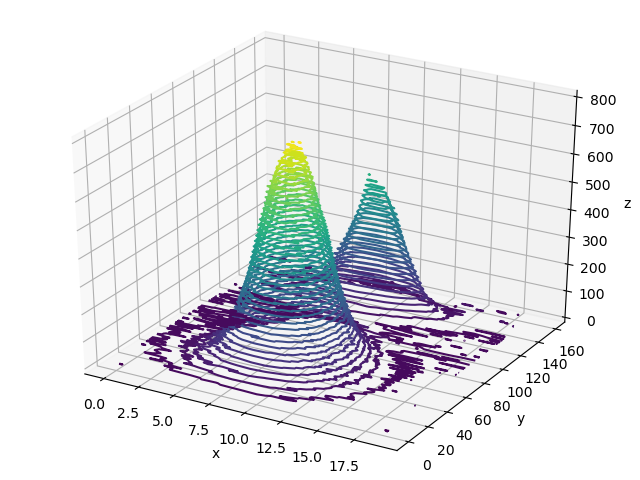

<IPython.core.display.Javascript object>


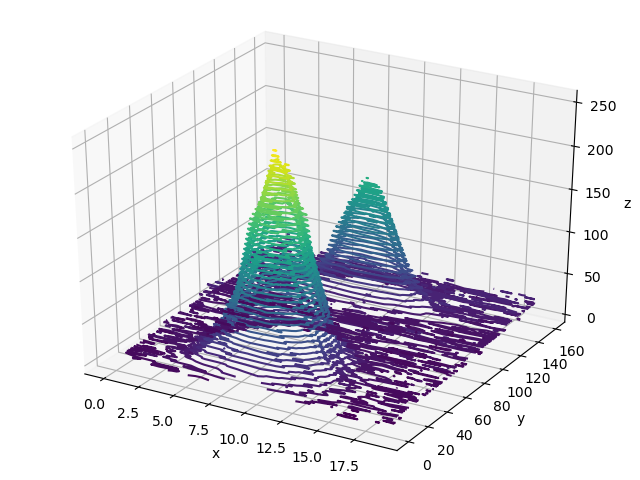

In [6]:
lx1, ly1 = np.shape(first_order.data)[1], np.shape(first_order.data)[0]
x1 = np.arange(0, lx1, 1)
y1 = np.arange(0, ly1, 1)

X1, Y1 = np.meshgrid(x1, y1)
Z1 = first_order.data

fig = plt.figure()
#ax = plt.axes(projection='3d')
ax = Axes3D(fig)

ax.contour3D(X1, Y1, Z1, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

lx2, ly2 = np.shape(second_order.data)[1], np.shape(second_order.data)[0]
x2 = np.arange(0, lx2, 1)
y2 = np.arange(0, ly2, 1)

X2, Y2 = np.meshgrid(x2, y2)
Z2 = second_order.data

fig = plt.figure()
#ax = plt.axes(projection='3d')
ax = Axes3D(fig)

ax.contour3D(X2, Y2, Z2, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# 2d Gaussian Fitting

In [7]:
def twoD_Gaussian((x, y), amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    
    return g

In [ ]:
test_cutout = Cutout2D(data, (195, 80), (195, 20))# (x_c, y_c), (dy, dx) for whatever unbelievably stupid reason??
lx1, ly1 = np.shape(test_cutout.data)[1], np.shape(test_cutout.data)[0]
y1 = np.arange(0, ly1, 1)
x1 = np.arange(0, lx1, 1)

X1, Y1 = np.meshgrid(x1, y1)
Z1 = test_cutout.data

fig = plt.figure()
#ax = plt.axes(projection='3d')
ax = Axes3D(fig)

ax.contour3D(X1, Y1, Z1, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [ ]:
file = open('test_order1.txt', 'w')
pickle.dump(test_cutout.data, file)
file.close()

<IPython.core.display.Javascript object>


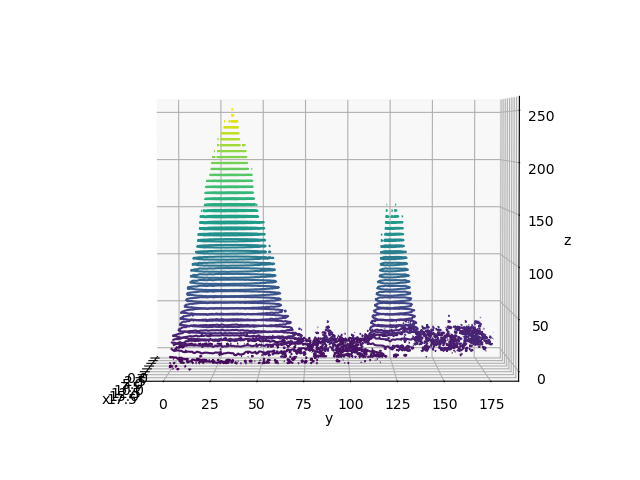

In [8]:
test_cutout = Cutout2D(data, (242, 80), (195, 20))# (x_c, y_c), (dy, dx) for whatever unbelievably stupid reason??
lx1, ly1 = np.shape(test_cutout.data)[1], np.shape(test_cutout.data)[0]
y1 = np.arange(0, ly1, 1)
x1 = np.arange(0, lx1, 1)

X1, Y1 = np.meshgrid(x1, y1)
Z1 = test_cutout.data

fig = plt.figure()
#ax = plt.axes(projection='3d')
ax = Axes3D(fig)

ax.contour3D(X1, Y1, Z1, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [ ]:
file = open('test_order2.txt', 'w')
pickle.dump(test_cutout.data, file)
file.close()

<IPython.core.display.Javascript object>


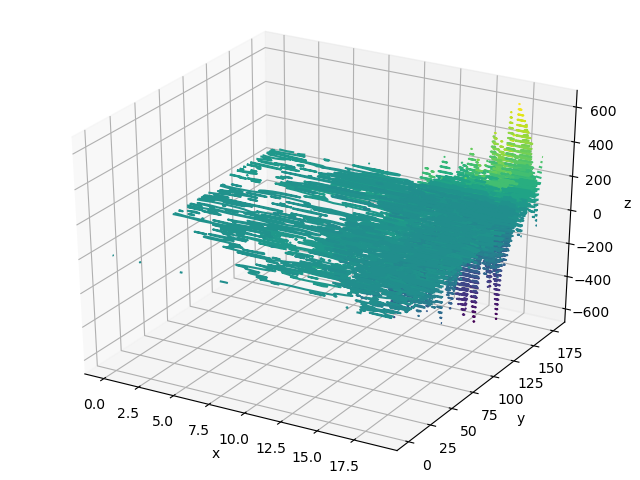

In [26]:
test_cutout = Cutout2D(data, (141, 80), (195, 20))# (x_c, y_c), (dy, dx) for whatever unbelievably stupid reason??
lx1, ly1 = np.shape(test_cutout.data)[1], np.shape(test_cutout.data)[0]
y1 = np.arange(0, ly1, 1)
x1 = np.arange(0, lx1, 1)

X1, Y1 = np.meshgrid(x1, y1)
Z1 = test_cutout.data

fig = plt.figure()
#ax = plt.axes(projection='3d')
ax = Axes3D(fig)

ax.contour3D(X1, Y1, Z1, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [24]:
file = open('trace_order.txt', 'w')
pickle.dump(test_cutout.data, file)
file.close()

In [ ]:
fit_base = np.zeros(shape = (90,90))
for i in range(len(test_cutout.data)):
    slice_data = test_cutout.data[i]
    slice_mod = np.append(slice_data, np.zeros(len(y1) - len(x1)))
    
    fit_base[i] = slice_mod
    
    #print len(slice_data)
    #print len(x1), len(y1)
    #print len(slice_mod)
    
print (np.shape(fit_base))
    #fit_data[i] = np.append(test_cutout.data, np.zeros(shape=(len(y1) - len(x1), len(y1))))

    #print np.shape(fit_data)


#initial_guess = (800, 10, 50, 3, 30, 0, 0)
#popt, pcov = opt.curve_fit(twoD_Gaussian, (x1, y1), test_cutout.data, p0=initial_guess)


In [ ]:
lx1, ly1 = np.shape(test_cutout.data)[1], np.shape(test_cutout.data)[0]
y1 = np.arange(0, ly1, 1)
x1 = np.arange(0, ly1, 1)

X1, Y1 = np.meshgrid(x1, y1)
Z1 = fit_base

fig = plt.figure()
#ax = plt.axes(projection='3d')
ax = Axes3D(fig)

ax.contour3D(X1, Y1, Z1, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [ ]:
initial_guess = (800, 10, 50, 3, 30, 0, 0)
opt.curve_fit(twoD_Gaussian, (x1, y1), fit_base, p0=initial_guess)
#popt, pcov = opt.curve_fit(twoD_Gaussian, (x1, y1), fit_base, p0=initial_guess)


In [ ]:
fit_base[1][1]

In [ ]:
len(x1)

In [ ]:
fit_base[1][1]

In [ ]:
len(test_cutout.data)

In [ ]:
test_cutout.data[0][0]

In [ ]:
np.shape(test_cutout.data)